In [13]:
# Import libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingModel import VotingModel
from model.EvalMetrics import EvalMetrics

# Add the directory containing the VotingModel to the Python path

from model.VotingRules import VotingRules

# Initialize simulation parameters
num_voters = 20
num_projects = 30
total_op_tokens = 300
num_rounds = 10
voter_type = 'random_uniform_model'
quorum=17
# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Add custom voting rules if any OR just simply add new voting rule in VotingRules.py class
# Example:
# model.add_voting_rule("custom_rule", custom_rule_function)

# Initialize the evaluation metrics
model.step()
eval_metrics = EvalMetrics(model)
output_dir = '/Users/idrees/Code/govxs/outdir_csv'

In [14]:
allocation_df=model.compile_fund_allocations()
allocation_df.to_csv(os.path.join(output_dir, 'allocation_df.csv'), index=False)

# Evaluate Egalitarian Score

In [3]:
egalitarian_results=eval_metrics.evaluate_egalitarian_score(num_rounds)
egalitarian_results.to_csv(os.path.join(output_dir, 'egalitarian_results.csv'), index=False)
egalitarian_results

,round,majoritarian_moving_phantoms_egalitarian_score,r1_quadratic_egalitarian_score,r2_mean_egalitarian_score,r3_median_egalitarian_score,r4_capped_median_egalitarian_score
0,1,7.693504e+06,7.731812e+06,7.715665e+06,7.738808e+06,7.738808e+06
1,2,7.898550e+06,7.832841e+06,7.838867e+06,7.887715e+06,7.887715e+06
2,3,7.862186e+06,7.842858e+06,7.851379e+06,7.893440e+06,7.893440e+06
3,4,7.678957e+06,7.694672e+06,7.699209e+06,7.712487e+06,7.712487e+06
4,5,7.735677e+06,7.799605e+06,7.764375e+06,7.793733e+06,7.793733e+06
...,...,...,...,...,...,...
95,96,7.816723e+06,7.854918e+06,7.846051e+06,7.885101e+06,7.885101e+06
96,97,7.964436e+06,7.978767e+06,7.976754e+06,7.961546e+06,7.961546e+06
97,98,8.185894e+06,8.190629e+06,8.163202e+06,8.211321e+06,8.211321e+06
98,99,7.792293e+06,7.801957e+06,7.825597e+06,7.802815e+06,7.802815e+06


In [4]:
egalitarian_results.describe()

,round,majoritarian_moving_phantoms_egalitarian_score,r1_quadratic_egalitarian_score,r2_mean_egalitarian_score,r3_median_egalitarian_score,r4_capped_median_egalitarian_score
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,50.500000,7.839980e+06,7.855612e+06,7.849199e+06,7.863960e+06,7.863960e+06
std,29.011492,8.243569e+04,8.105342e+04,8.033171e+04,7.871242e+04,7.871242e+04
min,1.000000,7.629977e+06,7.646431e+06,7.644558e+06,7.657574e+06,7.657574e+06
25%,25.750000,7.787071e+06,7.802486e+06,7.796991e+06,7.809471e+06,7.809471e+06
50%,50.500000,7.834873e+06,7.848658e+06,7.844103e+06,7.860169e+06,7.860169e+06
75%,75.250000,7.883579e+06,7.899996e+06,7.888230e+06,7.897673e+06,7.897673e+06
max,100.000000,8.185894e+06,8.190629e+06,8.163202e+06,8.211321e+06,8.211321e+06


# Evaluate Gini Index

In [5]:
gini_results,allocations = eval_metrics.evaluate_gini_index(num_rounds)
gini_results.to_csv(os.path.join(output_dir, 'gini_results.csv'), index=False)
print("Gini Index Results:")
gini_results.head(100)

Gini Index Results:


,round,majoritarian_moving_phantoms_gini_index,r1_quadratic_gini_index,r2_mean_gini_index,r3_median_gini_index,r4_capped_median_gini_index
0,1,0.056313,0.023869,0.046794,0.067615,0.067615
1,2,0.055860,0.022638,0.044774,0.065716,0.065716
2,3,0.055144,0.022392,0.043961,0.062742,0.062742
3,4,0.055312,0.021882,0.044027,0.066131,0.066131
4,5,0.055896,0.023089,0.045904,0.065038,0.065038
...,...,...,...,...,...,...
95,96,0.059234,0.024003,0.047637,0.066456,0.066456
96,97,0.059243,0.023950,0.048068,0.065523,0.065523
97,98,0.055341,0.022685,0.045206,0.067149,0.067149
98,99,0.054958,0.022561,0.044185,0.064316,0.064316


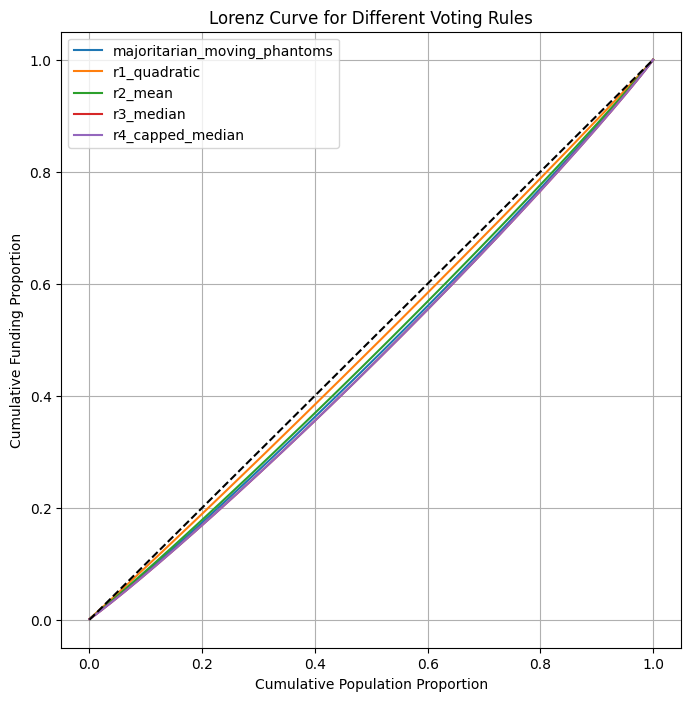

In [6]:
import matplotlib.pyplot as plt
def plot_lorenz_curve(averaged_cumulative_allocations):
        plt.figure(figsize=(8, 8))
        
        for voting_rule, lorenz_values in averaged_cumulative_allocations.items():
            # Lorenz curve starts at (0,0)
            plt.plot(np.linspace(0, 1, len(lorenz_values)), lorenz_values, label=voting_rule)
        
        # Line of equality
        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        
        plt.xlabel('Cumulative Population Proportion')
        plt.ylabel('Cumulative Funding Proportion')
        plt.title('Lorenz Curve for Different Voting Rules')
        plt.legend()
        plt.grid(True)
        plt.show()
plot_lorenz_curve(allocations)

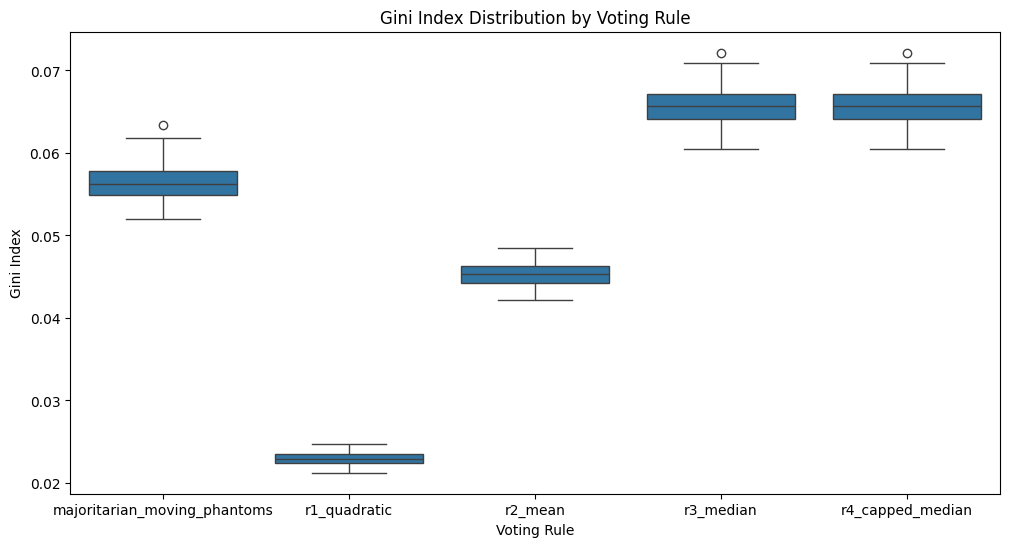

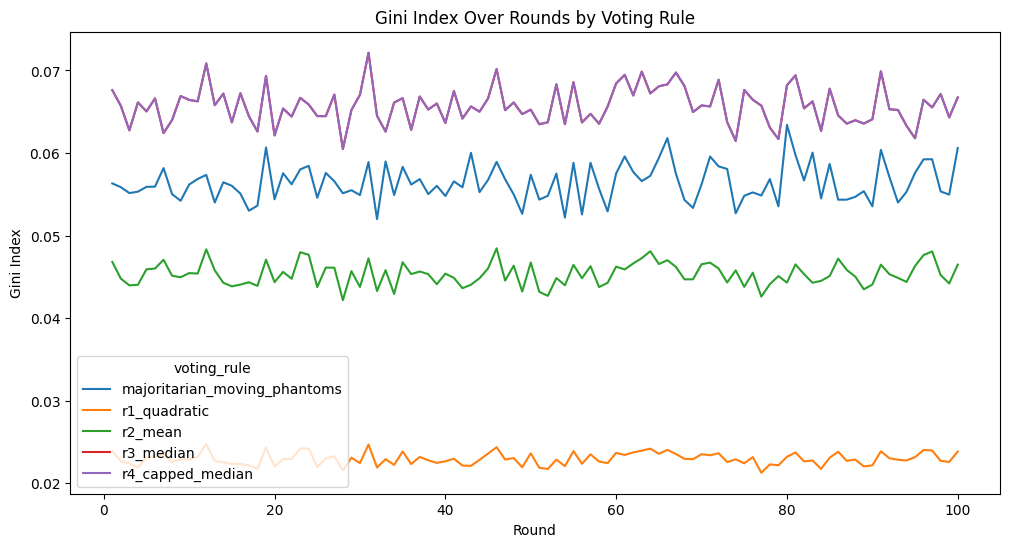

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long)
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()


# Evaluate Alignment with Ground Truth

In [8]:
alignment_results = eval_metrics.evaluate_alignment(num_rounds)
alignment_results.to_csv(os.path.join(output_dir, 'alignment_results.csv'), index=False)
print("Alignment Results:")
alignment_results.head(100)

Alignment Results:


,round,majoritarian_moving_phantoms_l1_distance,r1_quadratic_l1_distance,r2_mean_l1_distance,r3_median_l1_distance,r4_capped_median_l1_distance
0,1,765250.784846,333486.922742,628616.385499,902762.192804,902762.192804
1,2,817766.311533,348638.564654,643784.476111,968801.416728,968801.416728
2,3,782375.386994,361802.494859,673007.090373,958909.328649,958909.328649
3,4,811884.459780,357672.860112,677239.008786,955695.326710,955695.326710
4,5,792714.303938,331126.765626,623076.456562,919057.687994,919057.687994
...,...,...,...,...,...,...
95,96,796787.219978,354643.419525,667450.509115,942519.322856,942519.322856
96,97,798050.466175,341719.823248,662301.548052,927401.648869,927401.648869
97,98,791559.414143,363641.879475,695946.536457,901037.353887,901037.353887
98,99,807924.485234,360781.967016,686797.542826,946703.010906,946703.010906


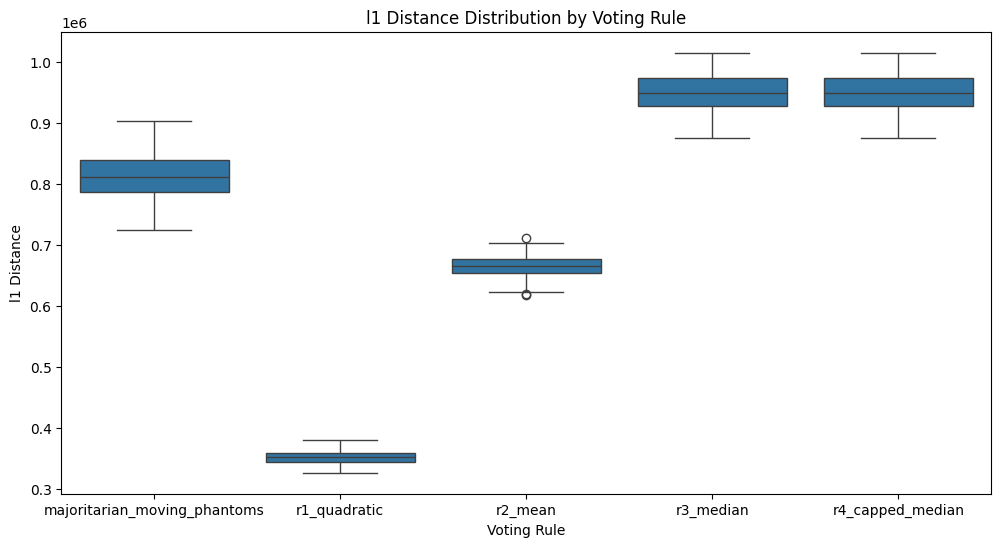

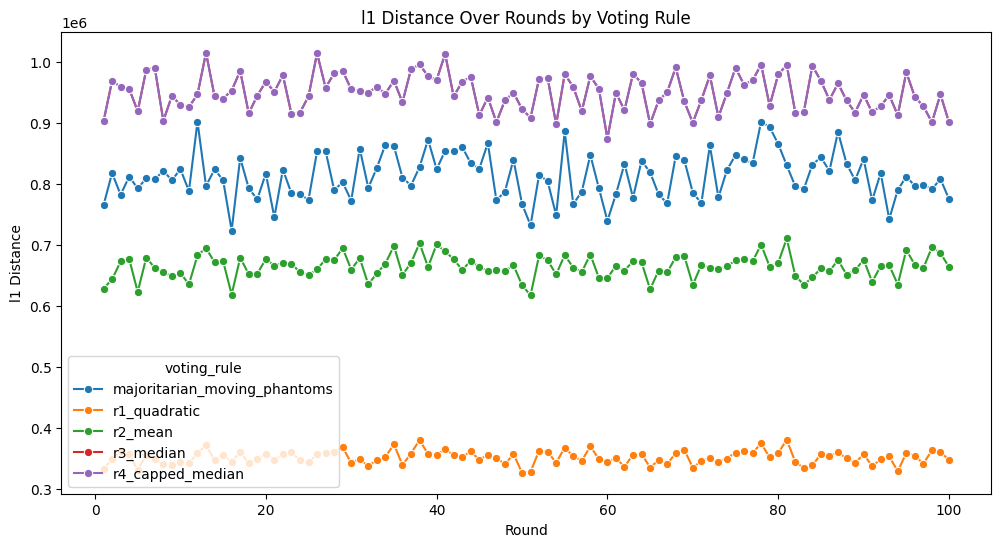

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
alignment_results_long = alignment_results.melt(id_vars=['round'], var_name='voting_rule', value_name='l1_distance')
alignment_results_long['voting_rule'] = alignment_results_long['voting_rule'].str.replace('_l1_distance', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='l1_distance', data=alignment_results_long)
plt.title('l1 Distance Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('l1 Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='l1_distance', hue='voting_rule', data=alignment_results_long, marker='o')
plt.title('l1 Distance Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('l1 Distance')
plt.show()


In [10]:
def calculate_alignment_metrics(alignment_results):
    metrics = {
        "voting_rule": [],
        "mean_l1_distance": [],
        "std_l1_distance": [],
        "min_l1_distance": [],
        "max_l1_distance": []
    }
    
    for voting_rule in model.voting_rules.keys():
        l1_distances = alignment_results[f"{voting_rule}_l1_distance"]
        metrics["voting_rule"].append(voting_rule)
        metrics["mean_l1_distance"].append(np.mean(l1_distances))
        metrics["std_l1_distance"].append(np.std(l1_distances))
        metrics["min_l1_distance"].append(np.min(l1_distances))
        metrics["max_l1_distance"].append(np.max(l1_distances))
    
    return pd.DataFrame(metrics)

# Calculate metrics
alignment_metrics = calculate_alignment_metrics(alignment_results)

alignment_metrics


,voting_rule,mean_l1_distance,std_l1_distance,min_l1_distance,max_l1_distance
0,majoritarian_moving_phantoms,812800.531048,37559.756753,723703.078824,9.022225e+05
1,r1_quadratic,352025.411518,10961.847506,326881.700713,3.807668e+05
2,r2_mean,664485.889654,18730.649574,617499.773858,7.106332e+05
3,r3_median,949424.990027,30066.381850,874396.198136,1.014949e+06
4,r4_capped_median,949424.990027,30066.381850,874396.198136,1.014949e+06


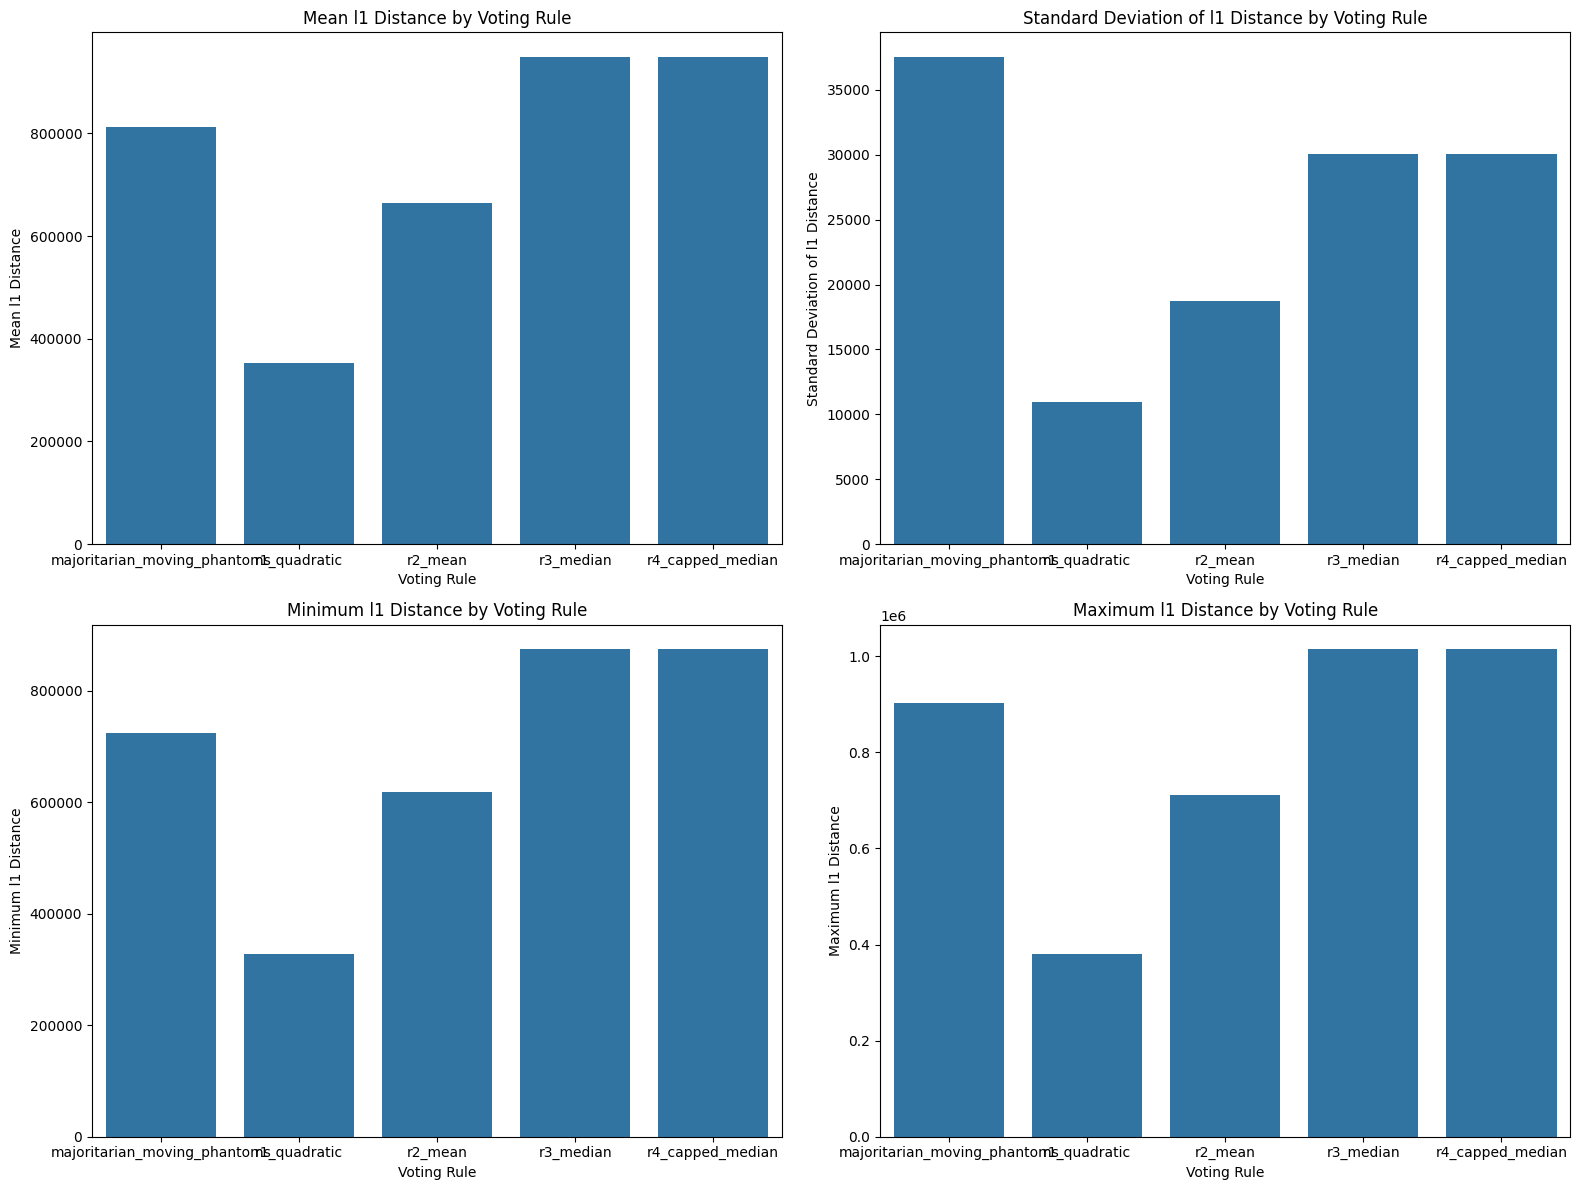

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean l1 Distance
sns.barplot(x='voting_rule', y='mean_l1_distance', data=alignment_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean l1 Distance by Voting Rule')
axes[0, 0].set_xlabel('Voting Rule')
axes[0, 0].set_ylabel('Mean l1 Distance')

# Standard Deviation of l1 Distance
sns.barplot(x='voting_rule', y='std_l1_distance', data=alignment_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of l1 Distance by Voting Rule')
axes[0, 1].set_xlabel('Voting Rule')
axes[0, 1].set_ylabel('Standard Deviation of l1 Distance')

# Minimum l1 Distance
sns.barplot(x='voting_rule', y='min_l1_distance', data=alignment_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Minimum l1 Distance by Voting Rule')
axes[1, 0].set_xlabel('Voting Rule')
axes[1, 0].set_ylabel('Minimum l1 Distance')

# Maximum l1 Distance
sns.barplot(x='voting_rule', y='max_l1_distance', data=alignment_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Maximum l1 Distance by Voting Rule')
axes[1, 1].set_xlabel('Voting Rule')
axes[1, 1].set_ylabel('Maximum l1 Distance')

plt.tight_layout()
plt.show()


# Evaluate Social Welfare

In [12]:
social_welfare_results = eval_metrics.evaluate_social_welfare(num_rounds)
social_welfare_results.to_csv(os.path.join(output_dir, 'social_welfare_results.csv'), index=False)
print("Social Welfare Results:")
social_welfare_results.head(100)

Social Welfare Results:


,round,majoritarian_moving_phantoms_social_welfare_avg_l1_distance,r1_quadratic_social_welfare_avg_l1_distance,r2_mean_social_welfare_avg_l1_distance,r3_median_social_welfare_avg_l1_distance,r4_capped_median_social_welfare_avg_l1_distance
0,1,7.328306e+06,7.351058e+06,7.346891e+06,7.351696e+06,7.351696e+06
1,2,7.311302e+06,7.334619e+06,7.330327e+06,7.334115e+06,7.334115e+06
2,3,7.300586e+06,7.323028e+06,7.318804e+06,7.323709e+06,7.323709e+06
3,4,7.284265e+06,7.307436e+06,7.302787e+06,7.306285e+06,7.306285e+06
4,5,7.295582e+06,7.318800e+06,7.313370e+06,7.318107e+06,7.318107e+06
...,...,...,...,...,...,...
95,96,7.319392e+06,7.342883e+06,7.336861e+06,7.341006e+06,7.341006e+06
96,97,7.315375e+06,7.338065e+06,7.333931e+06,7.338641e+06,7.338641e+06
97,98,7.313518e+06,7.335896e+06,7.330760e+06,7.335434e+06,7.335434e+06
98,99,7.266015e+06,7.287948e+06,7.283124e+06,7.290728e+06,7.290728e+06


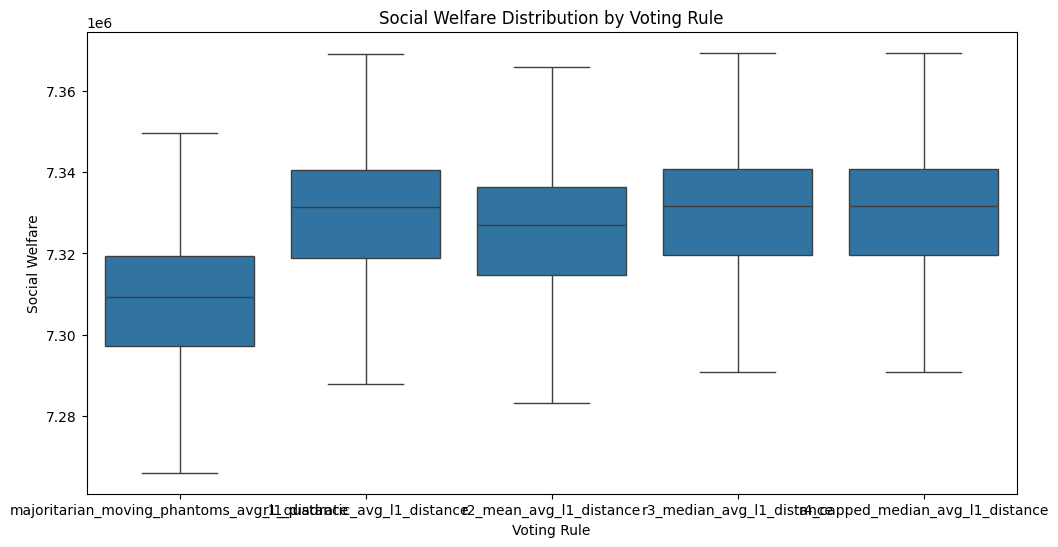

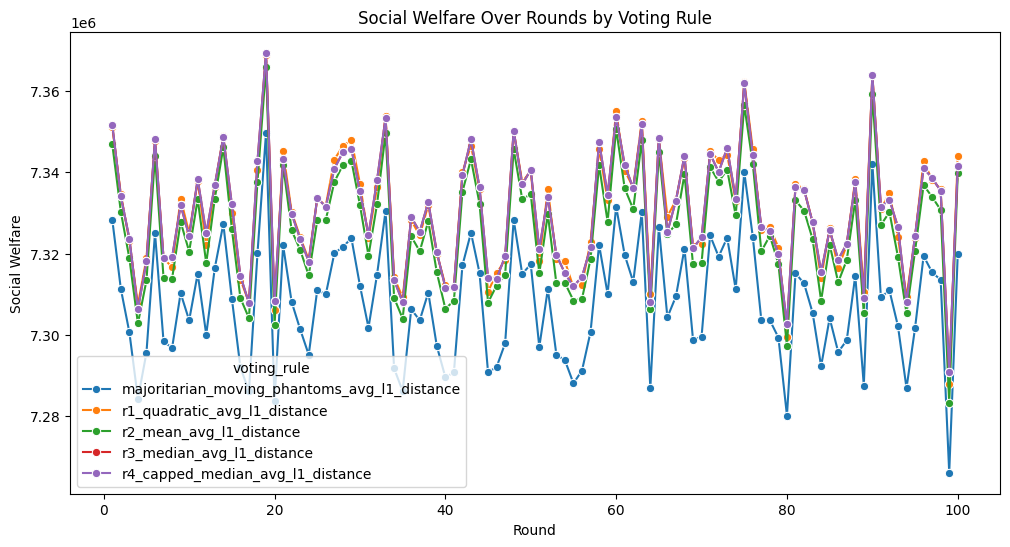

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()


# Evaluate Resistance to Control

Add Plots: Desired increase on x axis and number of projects on y axis

In [7]:
control_results = eval_metrics.evaluate_control(num_rounds,20)
control_results.to_csv(os.path.join(output_dir, 'control_results.csv'), index=False)
print("Control Results:")
control_results.head(100)

Voting Rule: majoritarian_moving_phantoms Original Funds for Project 0: 147.47059779985096
Voting Rule: majoritarian_moving_phantoms Target Funds for Project 0: 176.96471735982115
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after removing 1 voters: 147.4705936114738
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after removing 2 voters: 156.00153260918978
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after removing 3 voters: 173.6854000480629
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after removing 4 voters: 181.88679515739528
Voting Rule: majoritarian_moving_phantoms: Original Funds for Project 0: 147.47059779985096
Voting Rule: majoritarian_moving_phantoms: Target Funds for Project 0: 176.96471735982115
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after adding 1 voters: 169.29425117592533
Voting Rule: majoritarian_moving_phantoms: New Funds for Project 0 after adding 2 voter

,round,voting_rule,min_removal_cost,min_addition_cost,desired_increase
0,1,majoritarian_moving_phantoms,1,1,20
1,1,r1_quadratic,2,1,20
2,1,r2_mean,2,1,20
3,1,r3_median,1,1,20
4,1,r4_capped_median,Not Possible,8,20
5,2,majoritarian_moving_phantoms,1,1,20
6,2,r1_quadratic,3,1,20
7,2,r2_mean,2,1,20
8,2,r3_median,1,1,20
9,2,r4_capped_median,6,4,20


# Evaluate Robustness

In [3]:
robustness_results = eval_metrics.evaluate_robustness(num_rounds)
robustness_results.to_csv(os.path.join(output_dir, 'robustness_results.csv'), index=False)
print("Robustness Results:")
robustness_results.head(100)

Robustness Results:


,majoritarian_moving_phantoms_distances,r1_quadratic_distances,r2_mean_distances,r3_median_distances,r4_capped_median_distances,changed_vote_l1_distances,round
0,15.523697,11.359525,32.595708,14.652983,14.652983,497.0,1
1,10.326860,11.311558,32.592525,15.447898,15.447898,544.0,2
2,12.982038,11.355217,32.182539,9.658117,9.658117,519.0,3
3,12.009094,7.419829,18.038538,6.820701,6.820701,269.0,4
4,15.137305,11.446418,31.602456,14.119047,14.119047,466.0,5
5,9.993742,7.723002,20.424860,14.443788,14.443788,340.0,6
6,14.208671,11.789074,35.386540,7.782197,7.782197,577.0,7
7,17.539219,10.407388,27.809380,12.558419,12.558419,444.0,8
8,13.224501,8.588928,22.100968,17.055598,17.055598,353.0,9
9,79.036656,11.671869,32.419467,12.633999,12.633999,512.0,10


In [4]:
print(f"Avg Mean L1 Distance: {np.mean(robustness_results['r1_quadratic_distances'])}")
print(f"Avg Median L1 Distance: {np.mean(robustness_results['r2_mean_distances'])}")
print(f"Avg Quadratic L1 Distance: {np.mean(robustness_results['r3_median_distances'])}")
print(f"Avg Majortarian L1 Distance: {np.mean(robustness_results['majoritarian_moving_phantoms_distances'])}")
print(f"Avg R4 capped median L1 Distance: {np.mean(robustness_results['r4_capped_median_distances'])}")

Avg Mean L1 Distance: 10.307280760330263
Avg Median L1 Distance: 28.515298179258036
Avg Quadratic L1 Distance: 12.517274731447674
Avg Majortarian L1 Distance: 19.998178561264908
Avg R4 capped median L1 Distance: 12.517274731447687


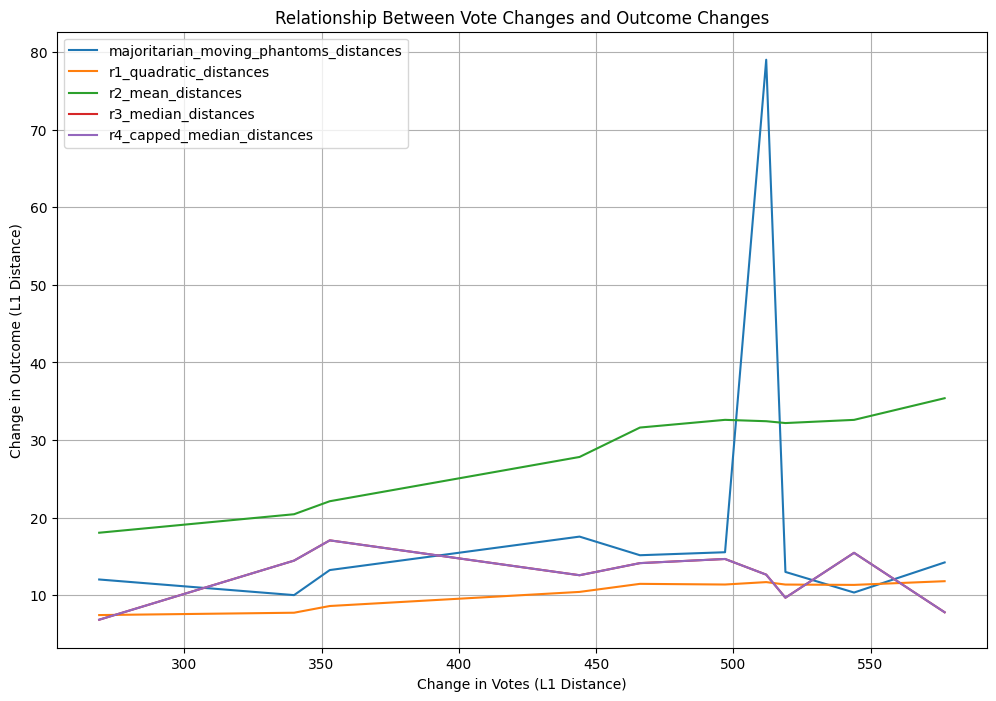

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_robustness_ordered(robustness_df):
    """Plot the relationship between vote changes and outcome changes after ordering by vote change."""
    # Replace 0 values with the column mean in the specified columns
    columns_to_replace = [
        'majoritarian_moving_phantoms_distances', 
        'r1_quadratic_distances', 
        'r2_mean_distances', 
        'r3_median_distances',
        'r4_capped_median_distances'
    ]
   

    # Sort by changed_vote_l1_distances
    robustness_df = robustness_df.sort_values(by='changed_vote_l1_distances').reset_index(drop=True)

    # Plot each voting rule's outcome change against the changed vote L1 distance
    plt.figure(figsize=(12, 8))
    
    for method in columns_to_replace:
        plt.plot(robustness_df['changed_vote_l1_distances'], robustness_df[method], label=method)

    plt.xlabel('Change in Votes (L1 Distance)')
    plt.ylabel('Change in Outcome (L1 Distance)')
    plt.title('Relationship Between Vote Changes and Outcome Changes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming robustness_df is your DataFrame with the results
plot_robustness_ordered(robustness_results)


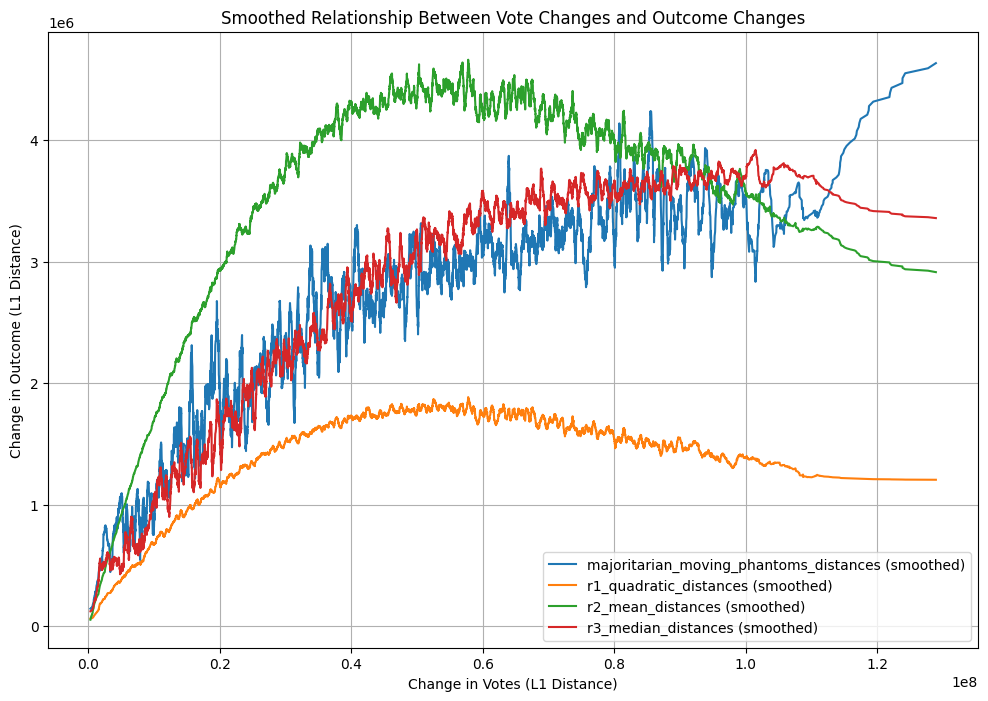

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

def plot_robustness_ordered(robustness_df, window_length=100, polyorder=2):
    """Plot the relationship between vote changes and outcome changes after applying Savitzky-Golay smoothing."""
    # Replace 0 values with the column mean in the specified columns
    columns_to_replace = [
        'majoritarian_moving_phantoms_distances', 
        'r1_quadratic_distances', 
        'r2_mean_distances', 
        'r3_median_distances'
    ]
   
    # Sort by changed_vote_l1_distances
    robustness_df = robustness_df.sort_values(by='changed_vote_l1_distances').reset_index(drop=True)

    # Apply smoothing to the voting rule columns using Savitzky-Golay filter
    smoothed_results = {}
    
    for method in columns_to_replace:
        smoothed_results[method] = savgol_filter(robustness_df[method], window_length=window_length, polyorder=polyorder)

    # Plot each voting rule's outcome change against the smoothed changed vote L1 distance
    plt.figure(figsize=(12, 8))
    
    for method in columns_to_replace:
        plt.plot(robustness_df['changed_vote_l1_distances'], smoothed_results[method], label=f"{method} (smoothed)")

    plt.xlabel('Change in Votes (L1 Distance)')
    plt.ylabel('Change in Outcome (L1 Distance)')
    plt.title('Smoothed Relationship Between Vote Changes and Outcome Changes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming robustness_df is your DataFrame with the results
plot_robustness_ordered(robustness_results)


# Evaluate Bribery Cost

In [8]:
#bribery_results = eval_metrics.evaluate_bribery(num_rounds)
bribery_results = eval_metrics.evaluate_bribery(num_rounds)
bribery_results.to_csv(os.path.join(output_dir, 'bribery_results.csv'), index=False)
print("Bribery Cost Results:")
bribery_results.head(100)

Bribery Cost Results:


,round,desired_increase,majoritarian_moving_phantoms_bribery_cost,r1_quadratic_bribery_cost,r2_mean_bribery_cost,r3_median_bribery_cost,r4_capped_median_bribery_cost
0,1,0.005,inf,0.308155,0.691683,0.027526,inf
1,2,0.010,inf,0.007232,1.383472,0.040153,inf
2,3,0.015,inf,8.537232,1.357739,0.077106,inf
3,4,0.020,inf,1.201087,2.272570,0.101382,inf
4,5,0.025,inf,0.008364,2.985415,0.115669,inf
5,6,0.030,inf,0.635400,3.734659,0.133822,inf
6,7,0.035,inf,0.062443,3.883618,0.156232,inf
7,8,0.040,inf,0.008766,5.620850,0.261285,inf
8,9,0.045,inf,0.424558,4.516780,0.176426,inf
9,10,0.050,inf,0.449257,5.932511,0.226697,inf


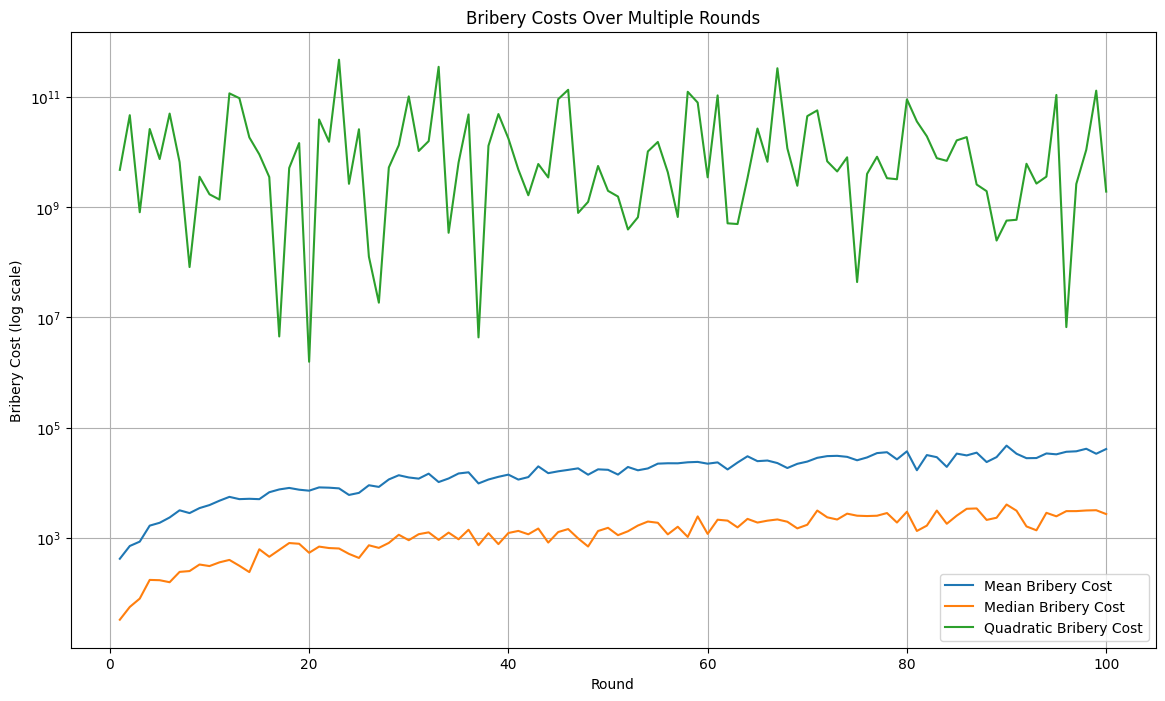

In [3]:
import matplotlib.pyplot as plt

# Plot the results with a logarithmic y-axis
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['round'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['round'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['round'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('Round')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Multiple Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

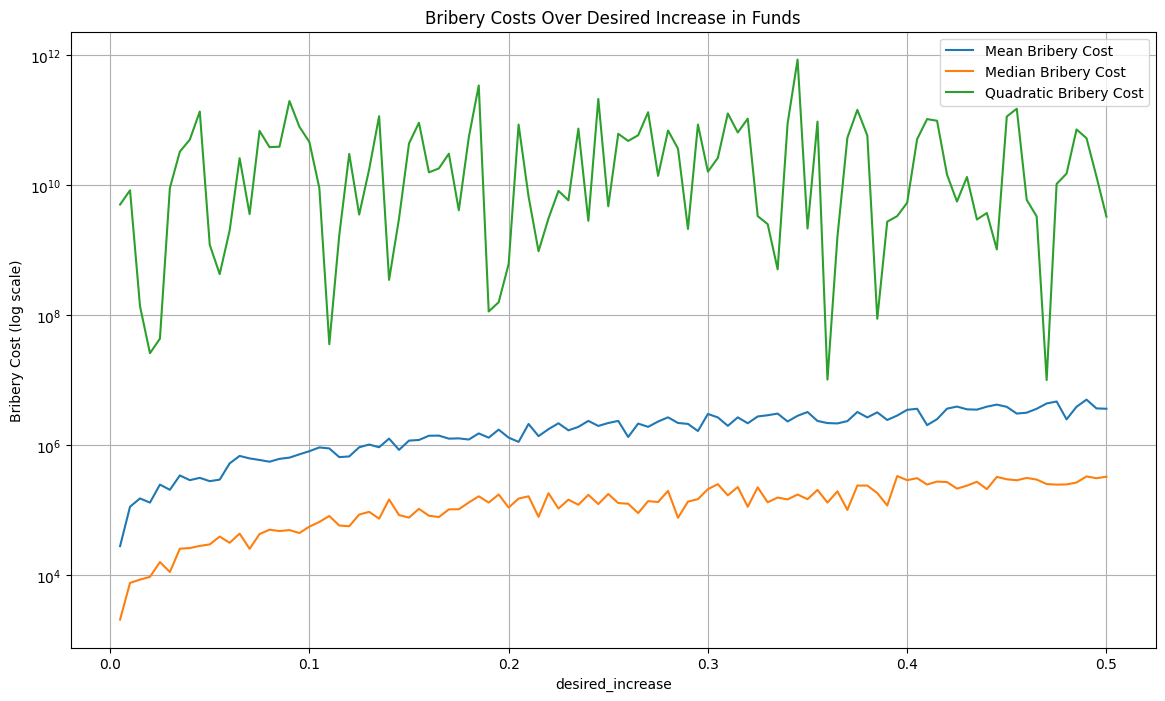

In [38]:
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['desired_increase'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['desired_increase'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['desired_increase'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('desired_increase')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Desired Increase in Funds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

In [ ]:
summary_stats = bribery_results[['r1_quadratic_bribery_cost', 'r2_mean_bribery_cost', 'r3_median_bribery_cost']].describe()
print(summary_stats)

       r1_quadratic_bribery_cost  r2_mean_bribery_cost  r3_median_bribery_cost
count               1.000000e+02          1.000000e+02              100.000000
mean                4.355673e+10          1.879971e+06           149697.821351
std                 7.896367e+10          1.193569e+06            99626.938413
min                 5.915012e+05          1.742684e+04             1624.281386
25%                 1.864007e+09          9.373602e+05            71992.920384
50%                 1.079780e+10          1.670760e+06           132679.337849
75%                 4.482480e+10          2.721158e+06           199297.836208
max                 5.084426e+11          4.786908e+06           410126.973751
